# ----------------    project: Emergency - 911 Calls    ----------------

    # For this project, we'll analyze 911 call data from Kaggle (https://www.kaggle.com/mchirico/montcoalert)
    # Since the dataset is large, we'll use a smaller version from any GitHub repo with similar data. 

#### --------  About dataset:  --------
    # The dataset includes the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### ----  Getting basic info from the dataset  ----

In [1]:
# import libraries
import numpy as np
import pandas as pd

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# shows figures in ipynb
%matplotlib inline

In [3]:
# Read in the csv file and as a dataframe
df = pd.read_csv("./data_call_911_small.csv")

# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
# inspect first 5 row
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# top 5 most appeared zip codes
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# top 5 townships (twp) for 911 calls?
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [16]:
# how many unique title codes are in the 'title' column?
# df['title'].unique # gets the uniques
df['title'].nunique()

110

___

### ----  Creating new features  ----

In [5]:
# Extract the department (EMS, Fire, or Traffic) from the title column using 
    # .apply() with a lambda function and store it in a new column called Reason.
    # Example: If title is "EMS: BACK PAINS/INJURY", then Reason will be "EMS".
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [6]:
# What is the common Reasons for a 911 call (use new column)?
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

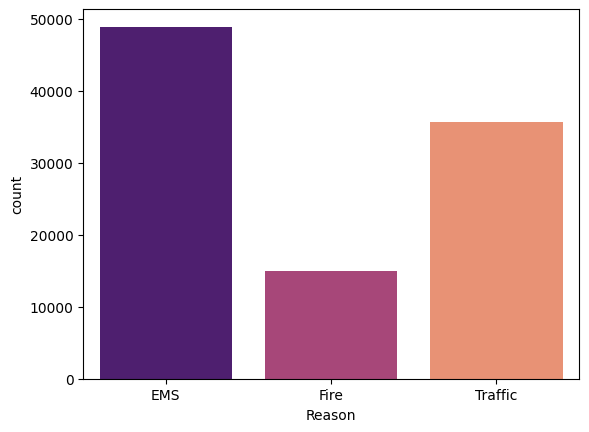

In [7]:
#  use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x='Reason', data=df, palette='magma')

___

### ----  time information  ----


In [17]:
# lets focus on time information. 
df["timeStamp"].dtypes  # Check the column's data type

dtype('O')

In [18]:
# data type of the objects in the timeStamp column
type(df["timeStamp"].iloc[0])   # Check the type of individual elements

str